In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import astropy
from astropy import constants as ac
import lightkurve
from astropy.modeling.models import BlackBody
from astropy import units as u

"A scale of 1 shows the Planck function with no scaling in the default units returned by BlackBody."

https://docs.astropy.org/en/stable/modeling/physical_models.html

In [12]:
ang_units = u.erg / (u.cm ** 2 * u.s * u.AA * u.sr)

In [13]:
ang_units

Unit("erg / (Angstrom cm2 s sr)")

In [17]:
temperature=3000*u.K
bb = BlackBody(temperature=temperature) #if you change units on scale it changes results of bb in each filter curve

bb2 = BlackBody(temperature=temperature,scale=1000*ang_units)

bb3 = BlackBody(temperature=temperature,scale=10000*ang_units)

bb4 = BlackBody(temperature=temperature,scale=1*ang_units)

In [18]:
wavelengths = np.logspace(np.log10(1000), np.log10(3e4), num=1000) * u.AA
bb_result1 = bb(wavelengths)
bb_result2 = bb2(wavelengths)
bb_result3 = bb3(wavelengths)
bb_result4 = bb4(wavelengths)

In [32]:
(2*np.pi*(0.2*6.95e10*u.cm)**2 / (3.69e19*u.cm)**2)

<Quantity 8.91572648e-19>

In [24]:
bb_result4 * ((0.2*6.95e10*u.cm)**2 / (3.69e19*u.cm)**2)

<Quantity [2.50885568e-28, 2.90318434e-28, 3.35763077e-28, 3.88106994e-28,
           4.48364301e-28, 5.17693153e-28, 5.97415465e-28, 6.89039238e-28,
           7.94283796e-28, 9.15108333e-28, 1.05374414e-27, 1.21273103e-27,
           1.39495838e-27, 1.60371152e-27, 1.84272390e-27, 2.11623600e-27,
           2.42906154e-27, 2.78666208e-27, 3.19523089e-27, 3.66178724e-27,
           4.19428234e-27, 4.80171831e-27, 5.49428174e-27, 6.28349345e-27,
           7.18237642e-27, 8.20564401e-27, 9.36991068e-27, 1.06939280e-26,
           1.21988483e-26, 1.39085204e-26, 1.58498188e-26, 1.80530125e-26,
           2.05521764e-26, 2.33856500e-26, 2.65965497e-26, 3.02333392e-26,
           3.43504653e-26, 3.90090660e-26, 4.42777584e-26, 5.02335152e-26,
           5.69626395e-26, 6.45618473e-26, 7.31394714e-26, 8.28167961e-26,
           9.37295395e-26, 1.06029497e-25, 1.19886362e-25, 1.35489748e-25,
           1.53051418e-25, 1.72807764e-25, 1.95022541e-25, 2.19989895e-25,
           2.48037707e-25

In [19]:
print(bb_result1[0])
print(bb_result2[0])
print(bb_result3[0])
print(bb_result4[0])

5.897637953018289e-22 erg / (cm2 Hz s sr)
1.7680673783294409e-06 erg / (Angstrom cm2 s sr)
1.768067378329441e-05 erg / (Angstrom cm2 s sr)
1.768067378329441e-09 erg / (Angstrom cm2 s sr)


(4000.0, 12000.0)

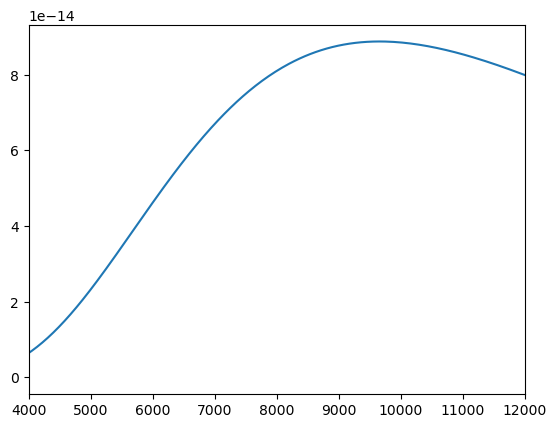

In [33]:
#plt.plot(wavelengths,bb_result1)
#plt.plot(wavelengths,bb_result2)
#plt.plot(wavelengths,bb_result3)
plt.plot(wavelengths,bb_result4*(2*np.pi*(0.2*6.95e10*u.cm)**2 / (3.69e19*u.cm)**2))
plt.xlim(4000,12000)